In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from IPython.display import Image

In [2]:
expo = pd.read_csv('acero-exportaciones-series.csv')
impo = pd.read_csv('acero-importaciones-series.csv')
prod = pd.read_csv('acero-produccion-series.csv')
cons = pd.read_csv('acero-consumo-series.csv')
tcrm_bcra=pd.read_excel('ITCRMSerie.xls')

In [3]:
tcrm_bcra

,Unnamed: 0,Índices con base 17-12-15=100,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Período,ITCRM,ITCRB Brasil,ITCRB Canadá,ITCRB Chile,ITCRB Estados Unidos,ITCRB México,ITCRB Uruguay,ITCRB China,ITCRB India,ITCRB Japón,ITCRB Reino Unido,ITCRB Suiza,ITCRB Zona Euro,ITCRB Vietnam,ITCRB Sudamérica*,Mes de referencia
1,1997-01-01 00:00:00,86.348,120.242,75.9954,92.2221,70.2782,73.9953,75.9724,58.4235,55.4918,30.6792,83.8864,71.5263,88.8509,63.2183,96.1453,1997-01-31 00:00:00
2,1997-01-02 00:00:00,86.3331,120.257,75.8069,92.3541,70.2728,73.7543,76.0094,58.4496,55.3291,30.7841,82.8572,71.5018,88.8678,63.1866,96.207,1997-01-31 00:00:00
3,1997-01-03 00:00:00,86.0561,120.262,75.7073,92.2032,70.2665,74.1226,76.0465,58.4751,55.3747,30.6557,82.8827,70.8812,87.9452,63.1748,96.1705,1997-01-31 00:00:00
4,1997-01-04 00:00:00,86.0622,120.289,75.7014,92.2046,70.2602,74.1721,76.0836,58.5005,55.3664,30.6612,82.8592,70.8781,87.9407,63.18,96.1925,1997-01-31 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,2020-10-21 00:00:00,119.133,96.7658,133.674,119.604,127.276,114.919,119.834,129.245,128.842,159.477,112.516,129.497,135.322,132.443,112.068,2020-10-31 00:00:00
8696,2020-10-22 00:00:00,119.435,97.4621,134.015,120.516,127.677,115.774,120.314,128.953,129.361,159.437,112.178,129.498,135.183,132.938,112.764,2020-10-31 00:00:00
8697,Nota: Datos provisorios sujetos a revisión.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8698,"Fuente: INDEC, Direcciones de Estadísticas de ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
tcrm_bcra_index=tcrm_bcra.loc[tcrm_bcra['Unnamed: 0'] == 'Período']
tcrm_bcra_index

,Unnamed: 0,Índices con base 17-12-15=100,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Período,ITCRM,ITCRB Brasil,ITCRB Canadá,ITCRB Chile,ITCRB Estados Unidos,ITCRB México,ITCRB Uruguay,ITCRB China,ITCRB India,ITCRB Japón,ITCRB Reino Unido,ITCRB Suiza,ITCRB Zona Euro,ITCRB Vietnam,ITCRB Sudamérica*,Mes de referencia


In [5]:
tcrm_bcra=tcrm_bcra.drop(tcrm_bcra.index[[8699,8698,8697]])
tcrm_bcra=tcrm_bcra.rename(columns=tcrm_bcra.iloc[0])
tcrm_bcra

,Período,ITCRM,ITCRB Brasil,ITCRB Canadá,ITCRB Chile,ITCRB Estados Unidos,ITCRB México,ITCRB Uruguay,ITCRB China,ITCRB India,ITCRB Japón,ITCRB Reino Unido,ITCRB Suiza,ITCRB Zona Euro,ITCRB Vietnam,ITCRB Sudamérica*,Mes de referencia
0,Período,ITCRM,ITCRB Brasil,ITCRB Canadá,ITCRB Chile,ITCRB Estados Unidos,ITCRB México,ITCRB Uruguay,ITCRB China,ITCRB India,ITCRB Japón,ITCRB Reino Unido,ITCRB Suiza,ITCRB Zona Euro,ITCRB Vietnam,ITCRB Sudamérica*,Mes de referencia
1,1997-01-01 00:00:00,86.348,120.242,75.9954,92.2221,70.2782,73.9953,75.9724,58.4235,55.4918,30.6792,83.8864,71.5263,88.8509,63.2183,96.1453,1997-01-31 00:00:00
2,1997-01-02 00:00:00,86.3331,120.257,75.8069,92.3541,70.2728,73.7543,76.0094,58.4496,55.3291,30.7841,82.8572,71.5018,88.8678,63.1866,96.207,1997-01-31 00:00:00
3,1997-01-03 00:00:00,86.0561,120.262,75.7073,92.2032,70.2665,74.1226,76.0465,58.4751,55.3747,30.6557,82.8827,70.8812,87.9452,63.1748,96.1705,1997-01-31 00:00:00
4,1997-01-04 00:00:00,86.0622,120.289,75.7014,92.2046,70.2602,74.1721,76.0836,58.5005,55.3664,30.6612,82.8592,70.8781,87.9407,63.18,96.1925,1997-01-31 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8692,2020-10-18 00:00:00,118.385,96.2556,133.092,117.497,127.316,114.551,119.255,128.499,129.216,158.1,110.381,128.025,133.633,132.511,111.002,2020-10-31 00:00:00
8693,2020-10-19 00:00:00,118.894,97.1888,133.274,118.888,127.275,114.202,119.504,128.705,129.172,157.996,110.81,128.781,134.293,132.478,111.86,2020-10-31 00:00:00
8694,2020-10-20 00:00:00,119.205,97.6966,133.79,118.842,127.3,114.928,119.774,128.81,129.05,158.019,110.629,129.198,134.931,132.438,112.104,2020-10-31 00:00:00
8695,2020-10-21 00:00:00,119.133,96.7658,133.674,119.604,127.276,114.919,119.834,129.245,128.842,159.477,112.516,129.497,135.322,132.443,112.068,2020-10-31 00:00:00


In [6]:
tcrm_bcra=tcrm_bcra.drop(tcrm_bcra.index[0])
tcrm_bcra.head()

,Período,ITCRM,ITCRB Brasil,ITCRB Canadá,ITCRB Chile,ITCRB Estados Unidos,ITCRB México,ITCRB Uruguay,ITCRB China,ITCRB India,ITCRB Japón,ITCRB Reino Unido,ITCRB Suiza,ITCRB Zona Euro,ITCRB Vietnam,ITCRB Sudamérica*,Mes de referencia
1,1997-01-01 00:00:00,86.348,120.242,75.9954,92.2221,70.2782,73.9953,75.9724,58.4235,55.4918,30.6792,83.8864,71.5263,88.8509,63.2183,96.1453,1997-01-31 00:00:00
2,1997-01-02 00:00:00,86.3331,120.257,75.8069,92.3541,70.2728,73.7543,76.0094,58.4496,55.3291,30.7841,82.8572,71.5018,88.8678,63.1866,96.207,1997-01-31 00:00:00
3,1997-01-03 00:00:00,86.0561,120.262,75.7073,92.2032,70.2665,74.1226,76.0465,58.4751,55.3747,30.6557,82.8827,70.8812,87.9452,63.1748,96.1705,1997-01-31 00:00:00
4,1997-01-04 00:00:00,86.0622,120.289,75.7014,92.2046,70.2602,74.1721,76.0836,58.5005,55.3664,30.6612,82.8592,70.8781,87.9407,63.18,96.1925,1997-01-31 00:00:00
5,1997-01-05 00:00:00,86.0683,120.317,75.6954,92.2061,70.2539,74.2218,76.1207,58.5259,55.358,30.6666,82.8356,70.8749,87.9361,63.1851,96.2145,1997-01-31 00:00:00


In [7]:
# Averiguo si bay valores nulos en el dataset #

tcrm_bcra.isnull().any()

Período                 False
ITCRM                   False
ITCRB Brasil            False
ITCRB Canadá            False
ITCRB Chile             False
ITCRB Estados Unidos    False
ITCRB México            False
ITCRB Uruguay           False
ITCRB China             False
ITCRB India             False
ITCRB Japón             False
ITCRB Reino Unido       False
ITCRB Suiza             False
ITCRB Zona Euro         False
ITCRB Vietnam           False
ITCRB Sudamérica*       False
Mes de referencia       False
dtype: bool

In [8]:
# Para poder tener los datos de manera prolija los agrupo por año #

tcrm_bcra.Período=pd.to_datetime(tcrm_bcra.Período)
tcrm_bcra['year']= tcrm_bcra.Período.dt.year
tcrm_bcra=tcrm_bcra.drop("Período",axis=1)
tcrm_bcra=tcrm_bcra.drop("Mes de referencia",axis=1)
tcrm_bcra.head()

,ITCRM,ITCRB Brasil,ITCRB Canadá,ITCRB Chile,ITCRB Estados Unidos,ITCRB México,ITCRB Uruguay,ITCRB China,ITCRB India,ITCRB Japón,ITCRB Reino Unido,ITCRB Suiza,ITCRB Zona Euro,ITCRB Vietnam,ITCRB Sudamérica*,year
1,86.348,120.242,75.9954,92.2221,70.2782,73.9953,75.9724,58.4235,55.4918,30.6792,83.8864,71.5263,88.8509,63.2183,96.1453,1997
2,86.3331,120.257,75.8069,92.3541,70.2728,73.7543,76.0094,58.4496,55.3291,30.7841,82.8572,71.5018,88.8678,63.1866,96.207,1997
3,86.0561,120.262,75.7073,92.2032,70.2665,74.1226,76.0465,58.4751,55.3747,30.6557,82.8827,70.8812,87.9452,63.1748,96.1705,1997
4,86.0622,120.289,75.7014,92.2046,70.2602,74.1721,76.0836,58.5005,55.3664,30.6612,82.8592,70.8781,87.9407,63.18,96.1925,1997
5,86.0683,120.317,75.6954,92.2061,70.2539,74.2218,76.1207,58.5259,55.358,30.6666,82.8356,70.8749,87.9361,63.1851,96.2145,1997


In [9]:
tcrm_bcra=tcrm_bcra.astype(int)

In [10]:
tcrm_bcra_by_year=tcrm_bcra.groupby(['year']).mean()
tcrm_bcra_by_year.head()

,ITCRM,ITCRB Brasil,ITCRB Canadá,ITCRB Chile,ITCRB Estados Unidos,ITCRB México,ITCRB Uruguay,ITCRB China,ITCRB India,ITCRB Japón,ITCRB Reino Unido,ITCRB Suiza,ITCRB Zona Euro,ITCRB Vietnam,ITCRB Sudamérica*
year,,,,,,,,,,,,,,,
1997,83.191781,118.975342,75.030137,95.430137,70.230137,79.082192,75.726027,59.161644,55.139726,30.254795,80.205479,65.783562,79.208219,60.539726,96.715068
1998,81.501370,113.123288,70.134247,90.564384,70.800000,79.054795,75.136986,58.293151,54.317808,31.005479,81.693151,65.306849,78.134247,56.750685,92.953425
1999,72.504110,77.112329,71.780822,86.027397,73.035616,89.019178,73.961644,58.084932,55.358904,38.767123,81.783562,64.134247,76.416438,56.961644,79.057534
2000,72.390710,82.117486,74.601093,84.672131,76.393443,99.292350,73.185792,58.833333,55.699454,44.756831,77.912568,58.442623,68.221311,55.418033,79.931694
2001,68.967123,69.821918,74.243836,75.887671,79.315068,108.630137,70.441096,59.852055,55.515068,43.076712,75.734247,59.791781,68.635616,53.493151,72.082192


In [11]:
# Evaluo los mismos puntos y agrupo de igual manera el resto de los datasets #
expo.head()

,indice_tiempo,acero_exportaciones_acero,acero_exportaciones_laminados_largos,acero_exportaciones_laminados_planos,acero_exportaciones_rieles,acero_exportaciones_tubos_con_costura,acero_exportaciones_tubos_sin_costura
0,1992-01-01,0.0,4.1,31.4,10.8,3.8,109.3
1,1992-04-01,0.0,25.1,57.5,20.5,1.6,125.8
2,1992-07-01,0.0,21.7,69.8,28.6,1.4,61.8
3,1992-10-01,0.0,10.1,65.2,14.8,4.3,173.9
4,1993-01-01,0.0,19.1,136.9,1.4,7.0,105.5


In [12]:
impo.head()

,indice_tiempo,acero_importaciones_acero,acero_importaciones_barras,acero_importaciones_laminados_largos,acero_importaciones_laminados_planos,acero_importaciones_rieles,acero_importaciones_tubos_con_costura,acero_importaciones_tubos_sin_costura
0,1992-01-01,0,0.0,17.7,259.9,0.1,4.0,1.1
1,1992-04-01,0,0.0,19.4,246.8,0.0,1.2,3.1
2,1992-07-01,0,0.0,24.9,228.7,0.1,3.2,1.8
3,1992-10-01,0,0.0,25.5,174.6,0.1,4.1,1.2
4,1993-01-01,0,0.0,20.8,112.9,0.0,2.1,1.0


In [13]:
prod.head()

,indice_tiempo,acero_produccion
0,1993-01-01,214500
1,1993-02-01,169000
2,1993-03-01,238700
3,1993-04-01,250200
4,1993-05-01,261200


In [14]:
cons.head()

,indice_tiempo,acero_consumo_tubos_sin_costura,acero_consumo_laminados_planos,acero_consumo_laminados_largos
0,2008-01-01,65,801,438
1,2008-04-01,84,787,524
2,2008-07-01,52,639,465
3,2008-10-01,29,463,423
4,2009-01-01,11,288,426


In [15]:
expo.isnull().any()

indice_tiempo                            False
acero_exportaciones_acero                False
acero_exportaciones_laminados_largos     False
acero_exportaciones_laminados_planos     False
acero_exportaciones_rieles               False
acero_exportaciones_tubos_con_costura    False
acero_exportaciones_tubos_sin_costura    False
dtype: bool

In [16]:
prod.isnull().any()

indice_tiempo       False
acero_produccion    False
dtype: bool

In [17]:
impo.isnull().any()

indice_tiempo                            False
acero_importaciones_acero                False
acero_importaciones_barras               False
acero_importaciones_laminados_largos     False
acero_importaciones_laminados_planos     False
acero_importaciones_rieles               False
acero_importaciones_tubos_con_costura    False
acero_importaciones_tubos_sin_costura    False
dtype: bool

In [18]:
cons.isnull().any()

indice_tiempo                      False
acero_consumo_tubos_sin_costura    False
acero_consumo_laminados_planos     False
acero_consumo_laminados_largos     False
dtype: bool

In [19]:
expo.indice_tiempo = pd.to_datetime(expo.indice_tiempo) 
expo['year'] = expo.indice_tiempo.dt.year
expo.head()

,indice_tiempo,acero_exportaciones_acero,acero_exportaciones_laminados_largos,acero_exportaciones_laminados_planos,acero_exportaciones_rieles,acero_exportaciones_tubos_con_costura,acero_exportaciones_tubos_sin_costura,year
0,1992-01-01,0.0,4.1,31.4,10.8,3.8,109.3,1992
1,1992-04-01,0.0,25.1,57.5,20.5,1.6,125.8,1992
2,1992-07-01,0.0,21.7,69.8,28.6,1.4,61.8,1992
3,1992-10-01,0.0,10.1,65.2,14.8,4.3,173.9,1992
4,1993-01-01,0.0,19.1,136.9,1.4,7.0,105.5,1993


In [20]:
expo_by_year = expo.groupby(["year"]).sum()
expo_by_year.head()

,acero_exportaciones_acero,acero_exportaciones_laminados_largos,acero_exportaciones_laminados_planos,acero_exportaciones_rieles,acero_exportaciones_tubos_con_costura,acero_exportaciones_tubos_sin_costura
year,,,,,,
1992,0.0,61.0,223.9,74.7,11.1,470.8
1993,0.0,99.5,269.6,10.5,25.5,478.1
1994,0.0,161.3,295.2,0.5,15.4,424.8
1995,0.0,258.8,559.3,4.0,27.1,483.2
1996,0.0,226.4,457.4,2.5,48.6,570.0


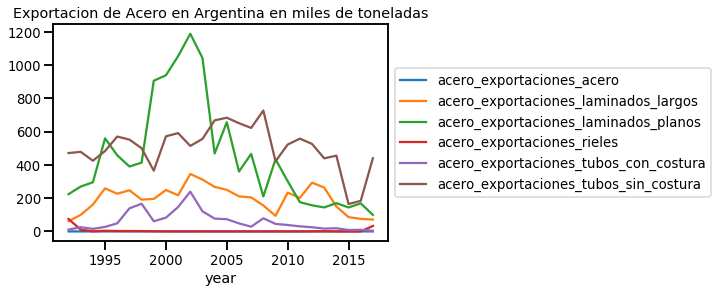

In [21]:
# Vemos graficamente como se comporta la exportación a traves de los años #
sns.set_context("talk", font_scale=0.8)
expo_by_year.plot(title = "Exportacion de Acero en Argentina en miles de toneladas" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [22]:
impo.indice_tiempo = pd.to_datetime(impo.indice_tiempo) 
impo['year'] = expo.indice_tiempo.dt.year
impo.head()

,indice_tiempo,acero_importaciones_acero,acero_importaciones_barras,acero_importaciones_laminados_largos,acero_importaciones_laminados_planos,acero_importaciones_rieles,acero_importaciones_tubos_con_costura,acero_importaciones_tubos_sin_costura,year
0,1992-01-01,0,0.0,17.7,259.9,0.1,4.0,1.1,1992
1,1992-04-01,0,0.0,19.4,246.8,0.0,1.2,3.1,1992
2,1992-07-01,0,0.0,24.9,228.7,0.1,3.2,1.8,1992
3,1992-10-01,0,0.0,25.5,174.6,0.1,4.1,1.2,1992
4,1993-01-01,0,0.0,20.8,112.9,0.0,2.1,1.0,1993


In [23]:
impo_by_year = impo.groupby(["year"]).sum()
impo_by_year.head()

,acero_importaciones_acero,acero_importaciones_barras,acero_importaciones_laminados_largos,acero_importaciones_laminados_planos,acero_importaciones_rieles,acero_importaciones_tubos_con_costura,acero_importaciones_tubos_sin_costura
year,,,,,,,
1992,0,0.0,87.5,910.0,0.3,12.5,7.2
1993,0,0.0,113.8,388.7,0.1,8.3,8.7
1994,0,0.0,130.6,371.6,0.5,17.5,20.3
1995,0,0.0,96.5,321.1,1.0,9.6,35.5
1996,0,0.0,155.7,351.3,3.3,10.1,13.6


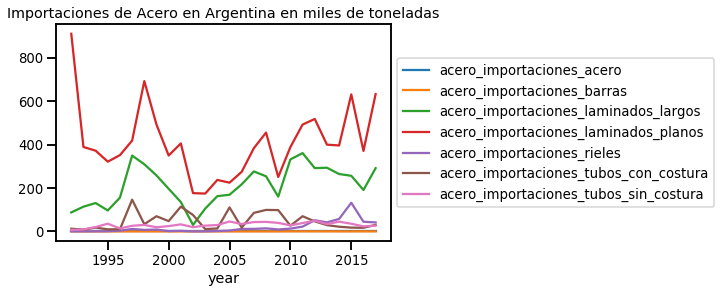

In [24]:
# Vemos graficamente como se comporta la importación a traves de los años #
sns.set_context("talk", font_scale=0.8)
impo_by_year.plot(title = "Importaciones de Acero en Argentina en miles de toneladas" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [25]:
# A primera vista, mientra mas se exporta, menos se importa (logicamente) #

In [26]:
cons.indice_tiempo =   pd.to_datetime(cons.indice_tiempo)
cons['year'] =  cons.indice_tiempo.dt.year
cons_by_year = cons.groupby(["year"]).sum() 
cons_by_year.head(40) 

,acero_consumo_tubos_sin_costura,acero_consumo_laminados_planos,acero_consumo_laminados_largos
year,,,
2008,230,2690,1850
2009,119,1748,1502
2010,286,2598,1723
2011,328,3033,1973
2012,358,2704,1831
2013,276,2863,1908
2014,345,2763,1896
2015,230,3042,1959
2016,215,2476,1492


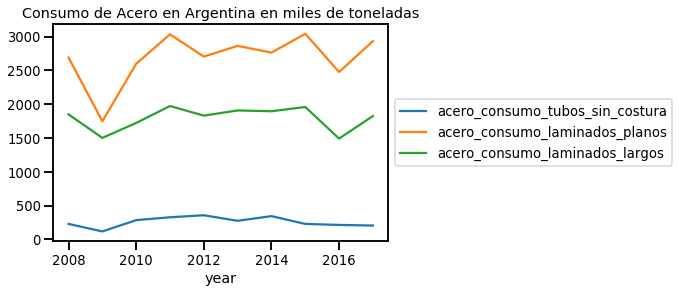

In [27]:
# Vemos graficamente como se comporta el consumo a traves de los años #
sns.set_context("talk", font_scale=0.8)
cons_by_year.plot(title = "Consumo de Acero en Argentina en miles de toneladas" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [28]:
prod.indice_tiempo =   pd.to_datetime(prod.indice_tiempo)
prod['year'] =  prod.indice_tiempo.dt.year
prod_by_year = prod.groupby(["year"]).sum()
prod_by_year.head() 

,acero_produccion
year,
1993,2885400
1994,3305000
1995,3568500
1996,4075100
1997,4169870


In [29]:
# El resto de los datos esta en miles de toneladas, debemos pasar a la misma unidad #
prod_by_year['acero_produccion']=prod_by_year['acero_produccion']/1000
prod_by_year.head() 

,acero_produccion
year,
1993,2885.40
1994,3305.00
1995,3568.50
1996,4075.10
1997,4169.87


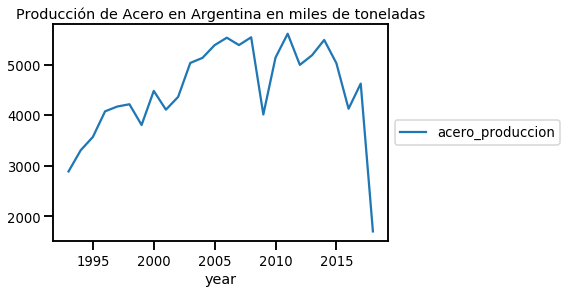

In [30]:
# Vemos graficamente como se comporta la producción a traves de los años #

sns.set_context("talk", font_scale=0.8)
prod_by_year.plot(title = "Producción de Acero en Argentina en miles de toneladas" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [31]:
#Creo una columna de totales en cada dataframe #

In [32]:
expo_by_year_total = expo_by_year["acero_exportaciones_laminados_largos"] + expo_by_year["acero_exportaciones_laminados_planos"]+expo_by_year["acero_exportaciones_rieles"]+expo_by_year["acero_exportaciones_tubos_con_costura"]+expo_by_year["acero_exportaciones_tubos_sin_costura"]
expo_by_year["Suma total exportaciones"] = expo_by_year_total
expo_by_year.head()

,acero_exportaciones_acero,acero_exportaciones_laminados_largos,acero_exportaciones_laminados_planos,acero_exportaciones_rieles,acero_exportaciones_tubos_con_costura,acero_exportaciones_tubos_sin_costura,Suma total exportaciones
year,,,,,,,
1992,0.0,61.0,223.9,74.7,11.1,470.8,841.5
1993,0.0,99.5,269.6,10.5,25.5,478.1,883.2
1994,0.0,161.3,295.2,0.5,15.4,424.8,897.2
1995,0.0,258.8,559.3,4.0,27.1,483.2,1332.4
1996,0.0,226.4,457.4,2.5,48.6,570.0,1304.9


In [33]:
impo_by_year_total = impo_by_year["acero_importaciones_laminados_largos"] + impo_by_year["acero_importaciones_laminados_planos"]+impo_by_year["acero_importaciones_rieles"]+impo_by_year["acero_importaciones_tubos_con_costura"]+impo_by_year["acero_importaciones_tubos_sin_costura"]
impo_by_year["Suma total importaciones"] = impo_by_year_total
impo_by_year.head()

,acero_importaciones_acero,acero_importaciones_barras,acero_importaciones_laminados_largos,acero_importaciones_laminados_planos,acero_importaciones_rieles,acero_importaciones_tubos_con_costura,acero_importaciones_tubos_sin_costura,Suma total importaciones
year,,,,,,,,
1992,0,0.0,87.5,910.0,0.3,12.5,7.2,1017.5
1993,0,0.0,113.8,388.7,0.1,8.3,8.7,519.6
1994,0,0.0,130.6,371.6,0.5,17.5,20.3,540.5
1995,0,0.0,96.5,321.1,1.0,9.6,35.5,463.7
1996,0,0.0,155.7,351.3,3.3,10.1,13.6,534.0


In [34]:
cons_by_year_total = cons_by_year["acero_consumo_tubos_sin_costura"] + cons_by_year["acero_consumo_laminados_planos"]+cons_by_year["acero_consumo_laminados_largos"]
cons_by_year["Suma total consumo"]=cons_by_year_total
cons_by_year.head()

,acero_consumo_tubos_sin_costura,acero_consumo_laminados_planos,acero_consumo_laminados_largos,Suma total consumo
year,,,,
2008,230,2690,1850,4770
2009,119,1748,1502,3369
2010,286,2598,1723,4607
2011,328,3033,1973,5334
2012,358,2704,1831,4893


In [35]:
# Junto todas las categorias de cada dataframe en 1 columna #

In [36]:
consumoimpo_by_year = pd.merge(cons_by_year,impo_by_year, how='left',left_index = True,  right_index = True)
consumoimpoexpo_by_year = pd.merge(consumoimpo_by_year,expo_by_year, how='left',left_index = True,  right_index = True)
consumoimpoexpoprod_by_year = pd.merge(consumoimpoexpo_by_year,prod_by_year, how='left',left_index = True,  right_index = True)
consumoimpoexpoprod_by_year.head(40)

,acero_consumo_tubos_sin_costura,acero_consumo_laminados_planos,acero_consumo_laminados_largos,Suma total consumo,acero_importaciones_acero,acero_importaciones_barras,acero_importaciones_laminados_largos,acero_importaciones_laminados_planos,acero_importaciones_rieles,acero_importaciones_tubos_con_costura,acero_importaciones_tubos_sin_costura,Suma total importaciones,acero_exportaciones_acero,acero_exportaciones_laminados_largos,acero_exportaciones_laminados_planos,acero_exportaciones_rieles,acero_exportaciones_tubos_con_costura,acero_exportaciones_tubos_sin_costura,Suma total exportaciones,acero_produccion
year,,,,,,,,,,,,,,,,,,,,
2008,230,2690,1850,4770,0,0.0,253.6,455.0,14.1,99.0,43.9,865.6,0.0,155.8,210.0,0.0,78.8,726.3,1170.9,5541.39
2009,119,1748,1502,3369,0,0.0,160.2,250.5,9.0,98.1,39.3,557.1,0.0,93.8,433.6,0.0,45.2,421.2,993.8,4013.09
2010,286,2598,1723,4607,0,0.3,331.6,388.4,12.9,26.4,27.8,787.1,0.0,232.9,301.9,0.0,38.6,521.8,1095.2,5139.10
2011,328,3033,1973,5334,0,0.3,360.5,491.8,22.1,69.9,38.6,982.9,0.0,201.5,175.7,0.0,30.5,557.6,965.3,5611.20
2012,358,2704,1831,4893,0,0.3,291.4,517.7,51.4,46.2,49.2,955.9,0.4,293.1,156.9,0.0,25.0,525.6,1000.6,4995.10
2013,276,2863,1908,5047,0,0.3,293.2,399.5,41.8,29.0,33.6,797.1,0.0,263.5,144.2,0.9,16.9,439.1,864.6,5185.60
2014,345,2763,1896,5004,0,0.1,264.2,395.7,57.4,21.6,45.0,783.9,0.0,150.2,169.9,0.0,19.1,455.4,794.6,5488.20
2015,230,3042,1959,5231,0,0.1,256.1,630.8,131.9,17.5,35.3,1071.6,0.0,85.7,144.0,0.0,8.5,164.6,402.8,5027.80
2016,215,2476,1492,4183,0,0.2,190.6,370.5,44.5,16.7,23.3,645.6,0.0,75.5,168.5,0.0,9.7,183.6,437.3,4126.50


In [37]:
Totales_by_year = consumoimpoexpoprod_by_year.groupby(["year"])["Suma total consumo", "Suma total importaciones","Suma total exportaciones","acero_produccion"].sum()
Totales_by_year.head(40)

C:\Users\Manuko\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Suma total consumo,Suma total importaciones,Suma total exportaciones,acero_produccion
year,,,,
2008,4770,865.6,1170.9,5541.39
2009,3369,557.1,993.8,4013.09
2010,4607,787.1,1095.2,5139.10
2011,5334,982.9,965.3,5611.20
2012,4893,955.9,1000.6,4995.10
2013,5047,797.1,864.6,5185.60
2014,5004,783.9,794.6,5488.20
2015,5231,1071.6,402.8,5027.80
2016,4183,645.6,437.3,4126.50


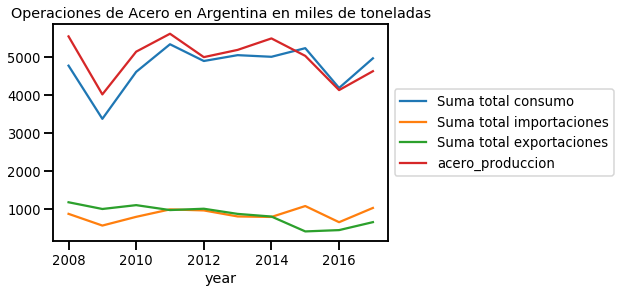

In [38]:
sns.set_context("talk", font_scale=0.8)
Totales_by_year.plot(title = "Operaciones de Acero en Argentina en miles de toneladas" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [39]:
#no aparece suma total consumo#

C:\Users\Manuko\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


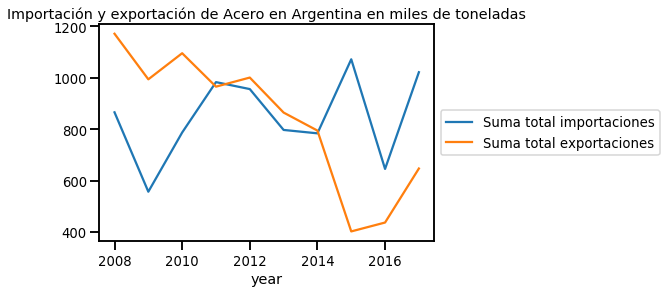

In [40]:
Totalesimpoexpo_by_year = consumoimpoexpoprod_by_year.groupby(["year"])[ "Suma total importaciones","Suma total exportaciones"].sum()
Totalesimpoexpo_by_year.head(40)
sns.set_context("talk", font_scale=0.8)
Totalesimpoexpo_by_year.plot(title = "Importación y exportación de Acero en Argentina en miles de toneladas" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

C:\Users\Manuko\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


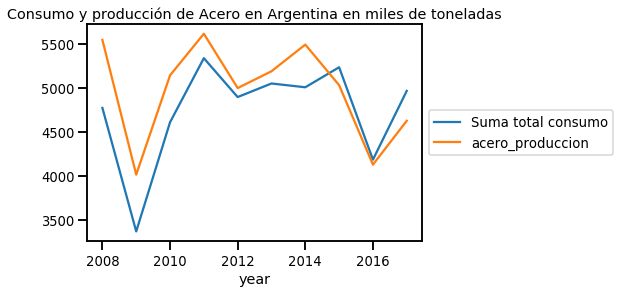

In [41]:
Totalesconsprod_by_year = consumoimpoexpoprod_by_year.groupby(["year"])[ "Suma total consumo","acero_produccion"].sum()
Totalesconsprod_by_year.head(40)
sns.set_context("talk", font_scale=0.8)
Totalesconsprod_by_year.plot(title = "Consumo y producción de Acero en Argentina en miles de toneladas" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [42]:
#CREO LA BALANZA COMERCIAL#

In [43]:
Totales_by_year['balanza']=Totales_by_year['Suma total exportaciones']-Totales_by_year['Suma total importaciones']
Totales_by_year

,Suma total consumo,Suma total importaciones,Suma total exportaciones,acero_produccion,balanza
year,,,,,
2008,4770,865.6,1170.9,5541.39,305.3
2009,3369,557.1,993.8,4013.09,436.7
2010,4607,787.1,1095.2,5139.10,308.1
2011,5334,982.9,965.3,5611.20,-17.6
2012,4893,955.9,1000.6,4995.10,44.7
2013,5047,797.1,864.6,5185.60,67.5
2014,5004,783.9,794.6,5488.20,10.7
2015,5231,1071.6,402.8,5027.80,-668.8
2016,4183,645.6,437.3,4126.50,-208.3


In [44]:
balanza=Totales_by_year.drop(['Suma total consumo','Suma total importaciones','Suma total exportaciones','acero_produccion'],axis=1)
balanza

,balanza
year,
2008,305.3
2009,436.7
2010,308.1
2011,-17.6
2012,44.7
2013,67.5
2014,10.7
2015,-668.8
2016,-208.3


In [45]:
tcrm_vs_balanza = pd.merge(balanza,tcrm_bcra_by_year, how='left', left_index = True,  right_index = True)
tcrm_vs_balanza.head(11)

,balanza,ITCRM,ITCRB Brasil,ITCRB Canadá,ITCRB Chile,ITCRB Estados Unidos,ITCRB México,ITCRB Uruguay,ITCRB China,ITCRB India,ITCRB Japón,ITCRB Reino Unido,ITCRB Suiza,ITCRB Zona Euro,ITCRB Vietnam,ITCRB Sudamérica*
year,,,,,,,,,,,,,,,,
2008,305.3,145.202186,177.658470,154.991803,146.431694,118.191257,151.486339,106.062842,104.505464,106.185792,114.680328,137.109290,123.155738,162.319672,104.836066,143.371585
2009,436.7,143.449315,174.969863,148.471233,139.602740,120.676712,134.361644,107.873973,108.197260,107.852055,133.186301,121.361644,125.180822,158.156164,106.671233,140.854795
2010,308.1,129.687671,172.260274,139.446575,129.219178,102.624658,124.893151,107.791781,94.312329,107.126027,124.115068,103.542466,109.668493,128.016438,90.534247,136.380822
2011,-17.6,121.219178,164.964384,127.295890,119.906849,89.879452,112.257534,102.882192,88.583562,97.610959,125.926027,95.460274,110.276712,117.301370,84.430137,129.252055
2012,44.7,103.658470,132.598361,113.693989,109.193989,81.565574,97.797814,94.166667,82.877049,82.500000,115.980874,86.281421,91.797814,98.740437,81.472678,112.030055
2013,67.5,99.841096,122.219178,106.893151,105.060274,79.717808,100.484932,97.356164,83.821918,80.298630,93.534247,83.967123,88.956164,99.339726,82.843836,108.241096
2014,10.7,105.112329,126.509589,107.926027,101.098630,85.920548,106.476712,98.942466,90.684932,87.295890,96.449315,95.334247,95.904110,106.156164,90.939726,108.849315
2015,-668.8,82.219178,87.997260,84.454795,82.446575,77.016438,82.320548,82.076712,80.835616,78.016438,77.673973,79.208219,80.616438,79.320548,79.383562,84.208219
2016,-208.3,93.721311,103.620219,94.483607,94.521858,89.344262,82.303279,93.087432,89.379781,89.131148,103.021858,81.035519,89.680328,90.830601,91.207650,97.073770


In [46]:
#Claramente estos dos ultimos estan relacionados-> Vamos a comparar con matriz de correalación#

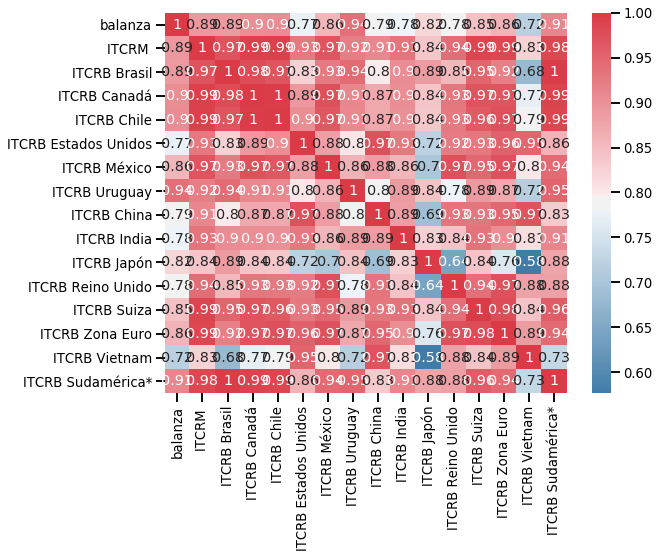

In [47]:
tcrm_vs_balanza_corr = tcrm_vs_balanza.corr()
tcrm_vs_balanza_corr.head()

f, ax = plt.subplots(figsize=(9, 7))
ax = sns.heatmap(tcrm_vs_balanza_corr,
               annot=True,
               cmap=sns.diverging_palette(240, 10, as_cmap=True))

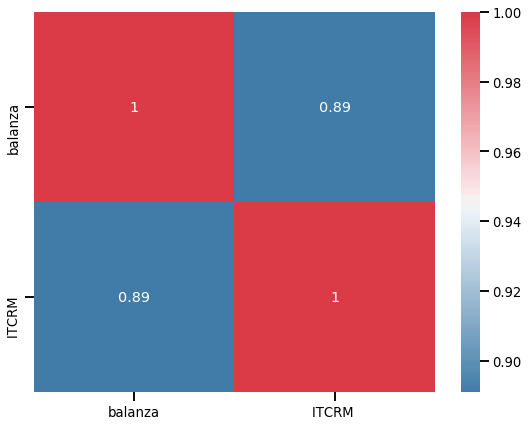

In [48]:
tcrm_vs_balanza2=tcrm_vs_balanza.drop(['ITCRB Brasil','ITCRB Canadá','ITCRB Chile','ITCRB Estados Unidos','ITCRB México','ITCRB Uruguay','ITCRB China','ITCRB India','ITCRB Japón','ITCRB Reino Unido','ITCRB Suiza','ITCRB Zona Euro','ITCRB Vietnam','ITCRB Sudamérica*'],axis=1)

tcrm_vs_balanza2_corr = tcrm_vs_balanza2.corr()
tcrm_vs_balanza2_corr.head()

f, ax = plt.subplots(figsize=(9, 7))
ax = sns.heatmap(tcrm_vs_balanza2_corr,
               annot=True,
               cmap=sns.diverging_palette(240, 10, as_cmap=True))


In [49]:
# Evidenciamos como claramente hay relación entre el valor del TCRM y la balanza comercial #

In [50]:
df = pd.merge(Totales_by_year,tcrm_bcra_by_year, how='left',left_index = True,  right_index = True)
df=df.drop(['ITCRB Brasil','ITCRB Canadá','ITCRB Chile','ITCRB Estados Unidos','ITCRB México','ITCRB Uruguay','ITCRB China','ITCRB India','ITCRB Japón','ITCRB Reino Unido','ITCRB Suiza','ITCRB Zona Euro','ITCRB Vietnam','ITCRB Sudamérica*'],axis=1)
df.head()

,Suma total consumo,Suma total importaciones,Suma total exportaciones,acero_produccion,balanza,ITCRM
year,,,,,,
2008,4770,865.6,1170.9,5541.39,305.3,145.202186
2009,3369,557.1,993.8,4013.09,436.7,143.449315
2010,4607,787.1,1095.2,5139.10,308.1,129.687671
2011,5334,982.9,965.3,5611.20,-17.6,121.219178
2012,4893,955.9,1000.6,4995.10,44.7,103.658470


In [51]:
# Vemos correlación entre otros valores #

df_corr = df.corr()
df_corr.head(10)


,Suma total consumo,Suma total importaciones,Suma total exportaciones,acero_produccion,balanza,ITCRM
Suma total consumo,1.000000,0.847044,-0.125215,0.789222,-0.515888,-0.473121
Suma total importaciones,0.847044,1.000000,-0.172994,0.535222,-0.628913,-0.459837
Suma total exportaciones,-0.125215,-0.172994,1.000000,0.397732,0.874552,0.841813
acero_produccion,0.789222,0.535222,0.397732,1.000000,0.050441,0.118633
balanza,-0.515888,-0.628913,0.874552,0.050441,1.000000,0.890911
ITCRM,-0.473121,-0.459837,0.841813,0.118633,0.890911,1.000000


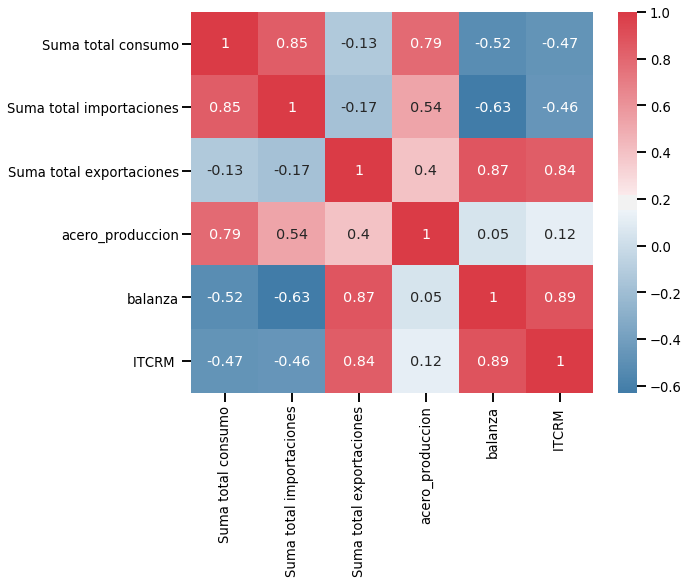

In [52]:
f, ax = plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_corr,
               annot=True,
               cmap=sns.diverging_palette(240, 10, as_cmap=True))

In [53]:
# Podemos sacar otro insight, se ve claramente la correlacíon entre valor de exportación y el TCRM #

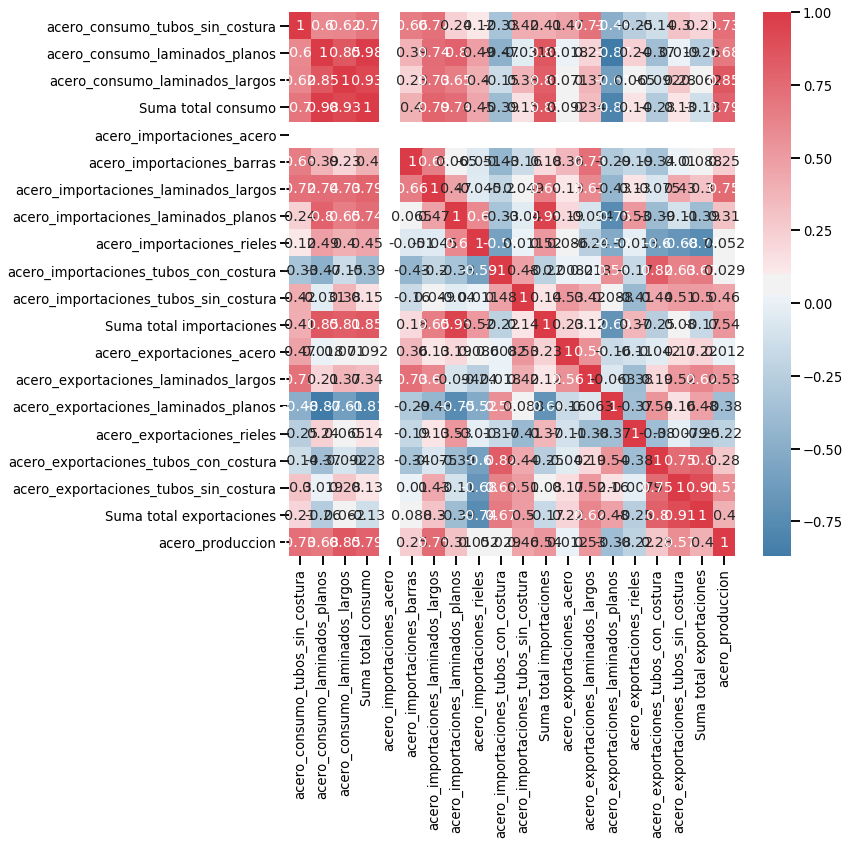

In [54]:
consumoimpoexpoprod_corr = consumoimpoexpoprod_by_year.corr()
f, ax2 = plt.subplots(figsize=(10, 10))
ax2 = sns.heatmap(consumoimpoexpoprod_corr,
               annot=True,
               cmap=sns.diverging_palette(240, 10, as_cmap=True))